<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/fastai/01_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://docs.fast.ai/tutorial.vision.html

In [1]:
from fastai.vision.all import *

In [2]:
path = Path('/content/PETS')
path = untar_data(URLs.PETS,data=path)

In [3]:
path.ls()

(#2) [Path('/content/PETS/oxford-iiit-pet/images'),Path('/content/PETS/oxford-iiit-pet/annotations')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
files[0],files[9]

(Path('/content/PETS/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),
 Path('/content/PETS/oxford-iiit-pet/images/Bombay_48.jpg'))

In [6]:
def label_func(f): return f[0].isupper()

In [7]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

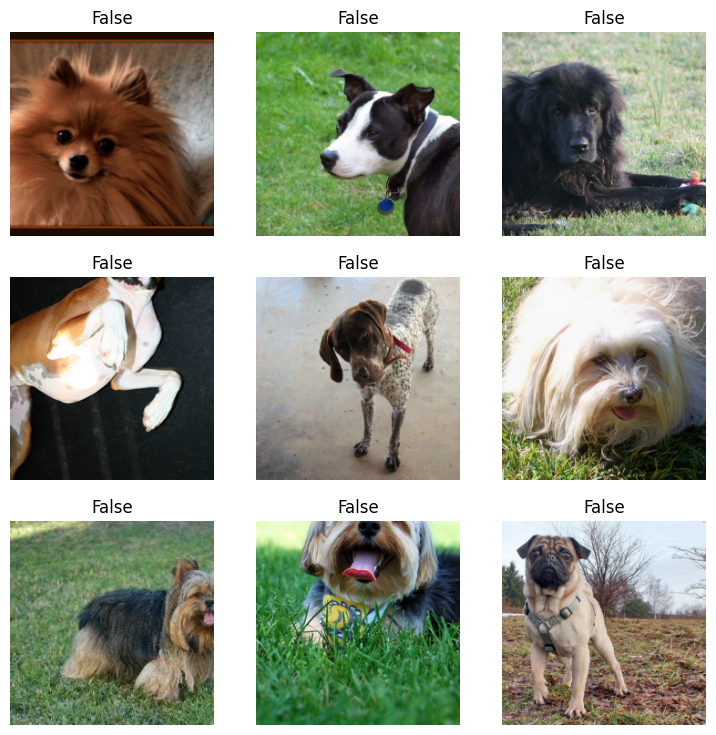

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.166257,0.020475,0.007442,00:56


epoch,train_loss,valid_loss,error_rate,time
0,0.054714,0.017044,0.007442,00:48


/content/PETS/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg


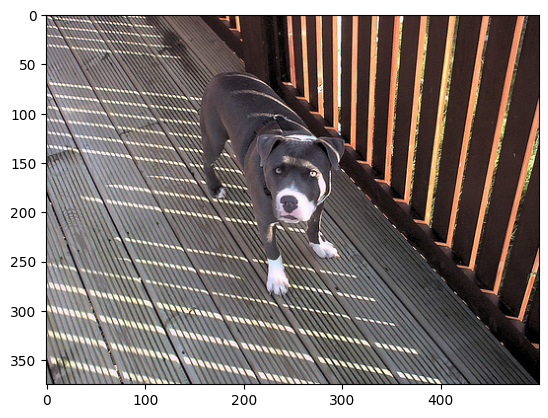

('False', tensor(0), tensor([9.9990e-01, 1.0237e-04]))

In [10]:
print(files[0])
im = PILImage.create(files[0])
plt.imshow(im)
plt.show()
learn.predict(files[0])

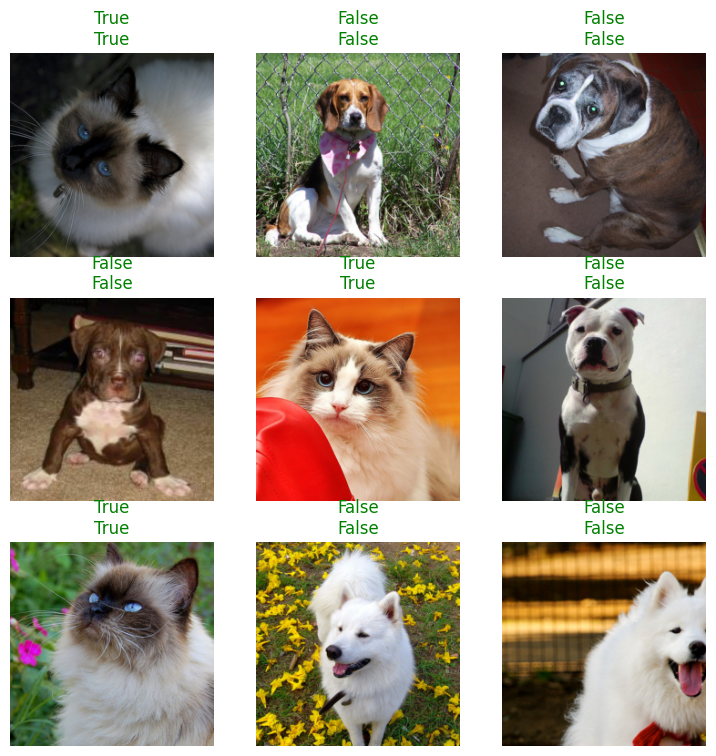

In [11]:
learn.show_results()